In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# 'observation.db' holds both Postgres and MySQL observations.
conn = sqlite3.connect('observation.db')

# These contain the start + end times for both MySQL and Postgres.
log_columns_mysql = ['id', 'start_time', 'end_time', 'time_delta', 'workload', 'concurrency', 'mpl', 'iso', 'avg_insertion', 'avg_selection','avg_transaction','avg_latency', 'lock_latency']
log_columns_postgres = ['id', 'start_time', 'end_time', 'time_delta', 'workload', 'concurrency', 'mpl', 'iso', 'avg_insertion', 'avg_selection','avg_transaction','transactions_committed', 'locks']
mysql_log = pd.read_csv('mysql-log.csv', names=log_columns_mysql)
postgres_log = pd.read_csv('postgres-log.csv', names=log_columns_postgres)

In [ ]:
# Average Transaction time of MIXED workload MySQL as a function of MPL and different isolation levels
#ru, rr, rc, s


#rc
mpls = mysql_log.query('workload == "i" and concurrency == "high" and iso == "rc"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rc"')['avg_transaction']
rc_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rc")


#rr
mpls = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['avg_transaction']
rr_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rr")

#ru
mpls = mysql_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['avg_transaction']
ru_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "ru")

#rs
mpls = mysql_log.query('workload == "c" and concurrency == "high" and iso == "s"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "high" and iso == "s"')['avg_transaction']
rs_plot_mysql, =plt.plot(mpls, mysql_response_time , label = "s")


plt.legend([ru_plot_mysql, rc_plot_mysql, rr_plot_mysql, rs_plot_mysql],["ru", "rc", "rr", "s"])

plt.title("Average Transaction Time on MIXED Workload/ MPL MYSQL (high-concurrency)")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Average Transactoin Time")



plt.show()

plt.savefig("fig_AVG_Trans_Time_MIXED_MYSQL_hc.png")
                                                                                                   


In [ ]:
# Average Transaction time of MIXED-only workload MySQL as a function of MPL and different isolation levels
#ru, rr, rc, s


#rc
mpls = mysql_log.query('workload == "i" and concurrency == "low" and iso == "rc"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "low" and iso == "rc"')['avg_transaction']
rc_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rc")


#rr
mpls = mysql_log.query('workload == "c" and concurrency == "low" and iso == "rr"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "low" and iso == "rr"')['avg_transaction']
rr_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "rr")

#ru
mpls = mysql_log.query('workload == "c" and concurrency == "low" and iso == "ru"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "low" and iso == "ru"')['avg_transaction']
ru_plot_mysql, = plt.plot(mpls, mysql_response_time, label = "ru")

#rs
mpls = mysql_log.query('workload == "c" and concurrency == "low" and iso == "s"')['mpl']
mysql_response_time = mysql_log.query('workload == "c" and concurrency == "low" and iso == "s"')['avg_transaction']
rs_plot_mysql, =plt.plot(mpls, mysql_response_time , label = "s")


plt.legend([ru_plot_mysql, rc_plot_mysql, rr_plot_mysql, rs_plot_mysql],["ru", "rc", "rr", "s"])

plt.title("Average Transaction Time on MIXED Workload/ MPL MYSQL (low-concurrency)")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Average Transactoin Time")



plt.show()

plt.savefig("fig_AVG_Trans_Time_MIXED_MYSQL_lc.png")
                                                                                                   


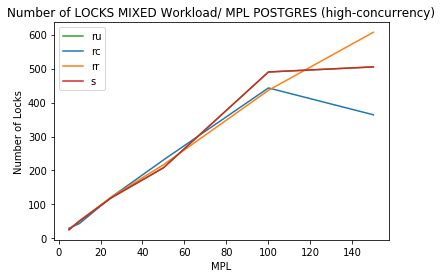

<Figure size 432x288 with 0 Axes>

In [3]:
# LOCKS of MIXED-only workload POSTGRES as a function of MPL and different isolation levels
#ru, rr, rc, s


#rc
mpls = postgres_log.query('workload == "i" and concurrency == "high" and iso == "rc"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "rc"')['locks']
rc_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "rc")


#rr
mpls = postgres_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "rr"')['locks']
rr_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "rr")

#ru
mpls = postgres_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "ru"')['locks']
ru_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "ru")

#rs
mpls = postgres_log.query('workload == "c" and concurrency == "high" and iso == "s"')['mpl']
mysql_response_time = postgres_log.query('workload == "c" and concurrency == "high" and iso == "s"')['locks']
rs_plot_postgres, =plt.plot(mpls, postgres_response_time , label = "s")


plt.legend([ru_plot_postgres, rc_plot_postgres, rr_plot_postgres, rs_plot_postgres],["ru", "rc", "rr", "s"])

plt.title("Number of LOCKS MIXED Workload/ MPL POSTGRES (high-concurrency)")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Number of Locks")



plt.show()

plt.savefig("fig_LOCKS_MIXED_POSTGRES_hc.png")
                                                                                                   


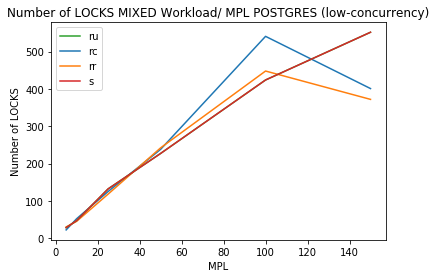

<Figure size 432x288 with 0 Axes>

In [4]:
# Average Transaction time of MIXED-only workload POSTGRES as a function of MPL and different isolation levels
#ru, rr, rc, s


#rc
mpls = postgres_log.query('workload == "i" and concurrency == "low" and iso == "rc"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "low" and iso == "rc"')['locks']
rc_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "rc")


#rr
mpls = postgres_log.query('workload == "c" and concurrency == "low" and iso == "rr"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "low" and iso == "rr"')['locks']
rr_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "rr")

#ru
mpls = postgres_log.query('workload == "c" and concurrency == "low" and iso == "ru"')['mpl']
postgres_response_time = postgres_log.query('workload == "c" and concurrency == "low" and iso == "ru"')['locks']
ru_plot_postgres, = plt.plot(mpls, postgres_response_time, label = "ru")

#rs
mpls = postgres_log.query('workload == "c" and concurrency == "low" and iso == "s"')['mpl']
mysql_response_time = postgres_log.query('workload == "c" and concurrency == "low" and iso == "s"')['locks']
rs_plot_postgres, =plt.plot(mpls, postgres_response_time , label = "s")


plt.legend([ru_plot_postgres, rc_plot_postgres, rr_plot_postgres, rs_plot_postgres],[ "ru", "rc", "rr", "s"])

plt.title("Number of LOCKS MIXED Workload/ MPL POSTGRES (low-concurrency)")
axes = plt.gca()

axes.set_xlabel("MPL")
axes.set_ylabel("Number of LOCKS")



plt.show()

plt.savefig("fig_LOCKS_MIXED_POSTGRES_lc.png")
                                                                